# 準備

In [ ]:
# Google Driveのマウント
from google.colab import drive
drive.mount('/content/drive/')

# 目的の場所（フォルダ・ディレクトリ）へ移動（各自の環境で適宜修正）
%cd "/content/drive/MyDrive/Colab Notebooks/JKJ1A/"
%ls

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/JKJ1A
csv/  data/  graph/  LICENSE  model/  notebook/  README.md  src/


# 画像分類問題

　画像分類問題とは，機械に大量の画像を入力し学習させて，画像を正しいカテゴリーに分類することである.画像分類は，データセット，モデル，最適化という三つの要素で成り立っている.

# データセット

　データセットとは，機械学習をするために必要なデータの集合体である.今回の画像分類実験では，画像と
ラベルの対を指す.画像データをモデルに入力し，出力としてその画像の予想ラベルを得る.その予想ラベル と実際のラベルを比較し，モデルの最適化を行い学習していく.データセットは訓練用，テスト用の二つに分 かれており，前者を用いてモデルの学習をし，後者のデータセットを代入することでモデルの分類精度を調べ る.また実験では効率化のために，データセットをバッチサイズに従い，サブセットに分割する.バッチサイズとは一度に処理する画像の枚数である.具体的には CIFAR10 や FashionMNIST といったデータセットが存在する.








### CIFAR10 データセット

　CIFAR10 データセットでは 物体カラー写真と，airplane，automobile，bird，cat，deer，dog，frog，horse，ship，truck という 10 種 のラベルが対となる.各画像のフォーマットは 24bit の RGB フルカラー画像であり，幅 32× 高さ 32 ピクセ ル.画像データ x は三次元テンソル，ラベル y は 10 次元ベクトルで構成されている.

### FashionMNIST

　FashionMNIST では，ファッション商品の写真と，T-shirt/top，Trouser，Pullover，Dress，Coat，Sandal， Shirt，Sneaker，Bag，Ankle boot という 10 種のラベルをデータセットとして持つ.画像は，8bit のグレー スケール (モノクロ) であり，幅 28× 高さ 28 フィールドとなっている.画像データ x は二次元行列，ラベル y は 10 次元ベクトルで構成されている．

# モデル

モデルは入力層，中間層，出力層で構成されているネットワークである.モデルの中間層やパラメータを増
加することで，画像の分類精度を上げていく.

# 最適化

ロス関数 l(y', y) とは，予測ラベル y' とラベル y の誤差を求める関数である.そこから出力される誤差が小
さくなるように，勾配降下法を用いてパラメータ θ を調整していく.調整を繰り返すことでモデルを学習させ，最適化を行う.

# 課題１

`train_cifar10.py`を作成せよ．`src`に補助用のテンプレートがあるのでそれを完成させよ．

- `lenet.py`にはネットワークの定義を書く
- `cifar10.py`には`load_data()`の定義を書く
- `train_cifar10.py`にはネットワークの訓練を書く
その際，
- 実験時間では学習データ数を制限したが，全てのデータを利用して学習せよ
```
trainloader, testloader, classes = load_data(batch_size, use_all=True)
```
の`use_all=True`のようにすれば良い．

作成した.pyファイルを以下のように実行せよ．

In [ ]:
%%time
!python src/ex1/1_1/train_cifar10.py --nepochs 2 --batch_size 128 --lr 0.01 --save_model_name 'model/model_cifar10_lenet.pth'

using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
[epoch  1] loss: 2.217
[epoch  2] loss: 1.808
Training completed
train acc = 0.380
 test acc = 0.382
CPU times: user 221 ms, sys: 26.1 ms, total: 247 ms
Wall time: 37.8 s


学習したモデルをロードし，訓練データ，テストデータでの精度を計算・表示せよ．

上のコードで学習後に出る精度と一致することを確認せよ．

In [ ]:
# `model_cifar10_day1.pth`をロードしてください．

import torch
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/JKJ1A/src/ex1/1_1')  # srcの中のファイルがimportできるようになる

from lenet import Net

net = Net() #新しいネットワークをつくる
net.cuda()   #ネットワークをgpuに送る

#torch.load()を用いることで，先ほど学習したネットワークのパラメータを読み込む
state_dict = torch.load('model/model_cifar10_lenet.pth')

#load_state_dict()を利用して，新しいネットワークにパラメータを読み込む
net.load_state_dict(state_dict)



<All keys matched successfully>

In [ ]:
# test()関数で訓練データ・テストデータでの分類精度を計算・表示してください
#import sys
#sys.path.append('/content/drive/MyDrive/Colab Notebooks/JKJ1A/src')  # srcの中のファイルがimportできるようになる

from train_cifar10 import test
from cifar10 import load_data

trainloader, testloader, labels = load_data(128, use_all=True)
train_acc = test(net, trainloader)
test_acc  = test(net, testloader)
print(f'train acc = {train_acc:.3f}')  # ':.3f'とつけると小数点以下3桁までの表示になる
print(f'test acc = {test_acc:.3f}')

Files already downloaded and verified
Files already downloaded and verified
train acc = 0.380
test acc = 0.382


# 課題２
**この課題の結果は次回の実験で利用するので必ず行うこと**


VGG11モデルでCIFAR10を学習せよ．課題１のコードを次のように微修正すれば良い．

- `from lenet import Net` --> `from vgg import VGG as Net`
- `net = Net()` --> `net = Net('VGG11')`

学習したモデルの分類精度を課題１の結果と比較せよ．学習したモデル名は`model_cifar10.pth`として`model/`下に保存せよ．テストデータでの分類精度は80%を超えるようにせよ（`nepochs`や`lr`を調整）．友人などと協力して，適当なパラメータを手分けして探すなどすると効率が良い．

In [ ]:
!python src/ex1/1_2/train2_cifar10.py --nepochs 15 --batch_size 128 --lr 0.03 --save_model_name 'model/model_cifar10.pth'

using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
[epoch  1] loss: 2.205
[epoch  2] loss: 1.452
[epoch  3] loss: 1.044
[epoch  4] loss: 0.824
[epoch  5] loss: 0.681
[epoch  6] loss: 0.561
[epoch  7] loss: 0.480
[epoch  8] loss: 0.397
[epoch  9] loss: 0.327
[epoch 10] loss: 0.268
[epoch 11] loss: 0.212
[epoch 12] loss: 0.170
[epoch 13] loss: 0.141
[epoch 14] loss: 0.110
[epoch 15] loss: 0.095
Training completed
train acc = 0.959
 test acc = 0.801


# 課題３

CIFAR10ではなくFashionMNISTを学習し，学習のログと分類精度を表示せよ（コードは`train_fmnist.py`とする）．


まず学習の前に，FashionMNISTがどのようなデータを含むか，何枚か画像とラベルを表示させてみよ（`Day1-CIFAR10-classification.ipynb`内のコードを参考にせよ）

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/JKJ1A


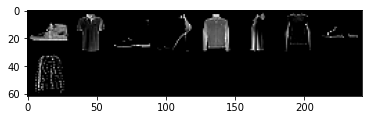

Ankle boot T-shirt/top Sandal Sandal  Coat Dress Pullover Sandal  Coat


In [ ]:
# FashionMNISTの画像を何枚か表示

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from torch.utils.data import random_split, DataLoader, Subset

import warnings
warnings.filterwarnings("ignore")  # warningを表示しない

import matplotlib.pyplot as plt
import numpy as np

def load_data(batch_size, n_train=15000, n_test=2500, use_all=False):

    # クラスのラベル名
    classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
            'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

    ## 前処理関数の準備
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5,),(0.5,))]
        )

    # CIFAR10の準備（ローカルにデータがない場合はダウンロードされる）
    # 訓練用データセット
    trainset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
    # 評価用データセット
    testset = FashionMNIST(root='./data', train=False, download=True, transform=transform)





    # !ミニバッチに小分けしておく．これを後で使う
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    # !ミニバッチに小分けしておく．これを後で使う
    testloader = DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    return (trainloader, testloader, classes)

trainloader, testloader, classes = load_data(9)

# trainloaderからミニバッチを一つ取り出す
dataiter = iter(trainloader)
images, labels = next(dataiter)  # ミニバッチを一つ取り出す

# !!画像を表示するための関数
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルのプリント
print(' '.join('%5s' % classes[labels[j]] for j in range(images.shape[0])))

In [ ]:
%ls

data/  LICENSE  model/  notebook/  README.md  src/


In [ ]:
from src.ex1.1_3.fmnist import load_data

# trainloaderからミニバッチを一つ取り出す
dataiter = iter(trainloader)
images, labels = next(dataiter)  # ミニバッチを一つ取り出す

# !!画像を表示するための関数
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 画像の表示
imshow(torchvision.utils.make_grid(images))
# ラベルのプリント
print(' '.join('%5s' % classes[labels[j]] for j in range(images.shape[0])))

SyntaxError: ignored

さて，学習のための作業の方針は次のようになる．課題１の`load_data()`を修正し，`fmnist.py`を作る．

- `load_data()`の`transform`を以下のようにする
```
    transform = transforms.Compose(
        [transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))]
        )
```

- `torchvision.datasets.CIFAR10`と`classes`も修正する（ほぼ自明な修正．わからなければ少し検索してみよ）．

またモデルは次のモデルを利用せよ（これは`mlp.py`として保存されている．train_fmnist.py内で読み込むこと）．
```
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):   
        super().__init__()
        self.width = 128
        self.fc1 = nn.Linear(28*28, self.width)  # 入力28*28次元, 出力128次元
        self.fc2 = nn.Linear(self.width, self.width)
        self.fc3 = nn.Linear(self.width, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

```

In [ ]:
%%time
#以下を実行できれば良い．
!python src/ex1/1_3/train_fmnist.py --nepochs 2 --batch_size 128 --lr 0.01 --save_model_name 'model/model_fmnist_mlp.pth'

using device: cuda:0
[epoch  1] loss: 0.660
[epoch  2] loss: 0.422
Training completed
train acc = 0.859
 test acc = 0.846
CPU times: user 286 ms, sys: 62.2 ms, total: 348 ms
Wall time: 53.6 s


# 課題4



モデルの表現力は学習可能なパラメタ数と関係がある．直感的には，学習可能なパラメタ数が多いほど複雑な関数を表現でき，難しい問題が解けると考えられる．次の課題に取り組め．

1. レイヤー数（`nn.Linear`の数）を固定した時，各中間層のユニット数（`self.width`の値）の変化に対し，学習結果はどのようになるだろうか．
2. 逆に，各中間層のユニット数を固定した時，レイヤー数を変化させると学習結果はどのようになるだろうか．
3. 深いネットワーク（レイヤー数が多いネットワーク）と広いネットワーク（各レイヤーのユニット数が多い），どちらが良いだろうか．（ほぼ）同じパラメタ数の場合で比較せよ．

文献調査を行い，どのような傾向があるか知った上でそれを再現しても良い．その場合は参考文献を示すこと．

---

*補足（1に関して）：課題3の`mlp.py`に定義したモデルに関して，ネットワークの幅`self.width`を何パターンか変化させ，FashionMNIST学習後の分類精度をプロットする（横軸`width`, 縦軸は分類精度）．*

*補足（2に関して）：課題3の`mlp.py`を参考に異なるレイヤー数のモデルを定義することになる．*

*補足（3に関して）：
`nn.Linear`は全結合層と呼ばれ，入力$x$に対し変換$Wx+b$を行い$z$を出力する（$W,b$は学習されるパラメタ）．$x,z$がそれぞれ$n,m$次元ベクトルの場合，全結合層一つ当たりのパラメタ数が$n,m$で表現できると思う．「同じパラメタ数」という条件が何を意味するのかよく考えること．*

*補足：
`plt.show()`の一つ前で`plt.savefig('画像名.pdf')`とすると，画像を保存できる．*

```
import matplotlib.pyplot as plt

parameters = ...
accs = ...

plt.plot(parameters, accs)  # x軸がparameters, 縦軸がaccs
plt.savefig('result.pdf')
plt.show()
```

In [ ]:
#課題4-1
#layerNum = 1, width = 32, 64, 128, 256, 512, 1024, 2048, 5000, 10000
%%time
#以下を実行できれば良い．
!python src/ex1/1_4/change_width.py --nepochs 10 --batch_size 128 --lr 0.01 --save_csv_name 'csv/fmnist_change_width.csv'

using device: cuda:0
[epoch  1] loss: 0.540
[epoch  2] loss: 0.371
[epoch  3] loss: 0.330
[epoch  4] loss: 0.304
[epoch  5] loss: 0.278
[epoch  6] loss: 0.259
[epoch  7] loss: 0.243
[epoch  8] loss: 0.230
[epoch  9] loss: 0.216
[epoch 10] loss: 0.200
Training completed
train acc = 0.931
 test acc = 0.884
[epoch  1] loss: 0.513
[epoch  2] loss: 0.359
[epoch  3] loss: 0.314
[epoch  4] loss: 0.283
[epoch  5] loss: 0.261
[epoch  6] loss: 0.243
[epoch  7] loss: 0.224
[epoch  8] loss: 0.204
[epoch  9] loss: 0.191
[epoch 10] loss: 0.175
Training completed
train acc = 0.944
 test acc = 0.892
[epoch  1] loss: 0.502
[epoch  2] loss: 0.349
[epoch  3] loss: 0.305
[epoch  4] loss: 0.276
[epoch  5] loss: 0.248
[epoch  6] loss: 0.227
[epoch  7] loss: 0.212
[epoch  8] loss: 0.189
[epoch  9] loss: 0.173
[epoch 10] loss: 0.159
Training completed
train acc = 0.951
 test acc = 0.888
tcmalloc: large alloc 1600004096 bytes == 0x77436000 @  0x7fd4c08efb6b 0x7fd4c090f379 0x7fd446e10935 0x7fd446dee093 0x7fd473

In [ ]:
#課題4-2
#layerNum = 1,3,5,7,9,11 width = 128
%%time
#以下を実行できれば良い．
!python src/ex1/1_4/change_layer.py --nepochs 10 --batch_size 128 --lr 0.01 --save_csv_name 'csv/fmnist_change_layer.csv'

using device: cuda:0
[epoch  1] loss: 0.678
[epoch  2] loss: 0.425
[epoch  3] loss: 0.381
[epoch  4] loss: 0.356
[epoch  5] loss: 0.331
[epoch  6] loss: 0.318
[epoch  7] loss: 0.302
[epoch  8] loss: 0.292
[epoch  9] loss: 0.282
[epoch 10] loss: 0.272
Training completed
train acc = 0.907
 test acc = 0.877
[epoch  1] loss: 1.154
[epoch  2] loss: 0.504
[epoch  3] loss: 0.439
[epoch  4] loss: 0.402
[epoch  5] loss: 0.379
[epoch  6] loss: 0.363
[epoch  7] loss: 0.346
[epoch  8] loss: 0.332
[epoch  9] loss: 0.325
[epoch 10] loss: 0.314
Training completed
train acc = 0.881
 test acc = 0.864
[epoch  1] loss: 2.286
[epoch  2] loss: 1.586
[epoch  3] loss: 0.872
[epoch  4] loss: 0.659
[epoch  5] loss: 0.558
[epoch  6] loss: 0.496
[epoch  7] loss: 0.459
[epoch  8] loss: 0.433
[epoch  9] loss: 0.410
[epoch 10] loss: 0.392
Training completed
train acc = 0.863
 test acc = 0.846
[epoch  1] loss: 2.303
[epoch  2] loss: 2.303
[epoch  3] loss: 2.302
[epoch  4] loss: 2.299
[epoch  5] loss: 2.272
[epoch  6

In [ ]:
#課題4-3
#広いモデル  レイヤー数1　 ユニット数i
#深いモデル  レイヤー数6  ユニット数j

for i in range(9000,10000):
  para = 784 * i + i**2 + i * 10
  for j in range(1,10000):
    para2 = 784 * j + pow(j, 2) * 6 + j * 10
    if abs(para - para2) <= 30:
      print(i, j, para, para2)
      break;


9599 4012 99762407 99762392
9834 4108 104515752 104515736


In [ ]:
#課題4-3
#広いモデル  レイヤー数1　 ユニット数9834
#深いモデル  レイヤー数6  ユニット数4108

%%time
#以下を実行できれば良い．
!python src/ex1/1_4/constant_para.py --nepochs 10 --batch_size 128 --lr 0.01 --save_csv_name 'csv/fmnist_conatant_para.csv'

using device: cuda:0
[epoch  1] loss: 2.298
[epoch  2] loss: 2.106
[epoch  3] loss: 1.239
[epoch  4] loss: 0.876
[epoch  5] loss: 0.735
[epoch  6] loss: 0.647
[epoch  7] loss: 0.587
[epoch  8] loss: 0.538
[epoch  9] loss: 0.501
[epoch 10] loss: 0.470
Training completed
train acc = 0.842
 test acc = 0.830
[epoch  1] loss: 0.514
[epoch  2] loss: 0.359
[epoch  3] loss: 0.317
[epoch  4] loss: 0.287
[epoch  5] loss: 0.261
[epoch  6] loss: 0.242
[epoch  7] loss: 0.222
[epoch  8] loss: 0.207
[epoch  9] loss: 0.191
[epoch 10] loss: 0.175
Training completed
train acc = 0.937
 test acc = 0.884
CPU times: user 1.92 s, sys: 308 ms, total: 2.23 s
Wall time: 6min 32s


In [ ]:
%%time
#以下を実行できれば良い．
!python src/ex1/1_4/constant_para2.py --nepochs 10 --batch_size 128 --lr 0.01 --save_csv_name 'csv/fmnist_conatant_para.csv'

using device: cuda:0
[epoch  1] loss: 1.558
[epoch  2] loss: 0.529
[epoch  3] loss: 0.392
[epoch  4] loss: 0.338
[epoch  5] loss: 0.298
[epoch  6] loss: 0.268
[epoch  7] loss: 0.245
[epoch  8] loss: 0.224
[epoch  9] loss: 0.207
[epoch 10] loss: 0.181
Training completed
train acc = 0.932
 test acc = 0.870
CPU times: user 1.1 s, sys: 159 ms, total: 1.26 s
Wall time: 3min 35s


In [ ]:
#gpuの情報
!nvidia-smi

Tue Jan  3 12:21:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------